In [5]:
import pandas as pd
data = pd.read_csv('StationeryOrder.csv', encoding = 'gbk')
data

,id,文具
0,1,笔袋
1,1,文件套
2,1,钢笔
3,2,电脑夹
4,2,橡皮
...,...,...
40050,9834,无线装订本
40051,9835,无孔文件夹
40052,9835,圆珠笔
40053,9835,修正带


In [6]:
# 3.2 数据处理
# 步骤一：查看缺失值、重复值以及异常值，并清洗
# 步骤二：根据“id”对“文具”列数据进行分组聚合
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40055 entries, 0 to 40054
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40055 non-null  int64 
 1   文具      40055 non-null  object
dtypes: int64(1), object(1)
memory usage: 626.0+ KB


In [14]:
def convert_str(a):
    if a[0] == '[':
        return a
    else:
        return [a]

In [15]:
data['文具'] = data['文具'].agg(convert_str)
data

,id,文具
0,1,[笔袋]
1,1,[文件套]
2,1,[钢笔]
3,2,[电脑夹]
4,2,[橡皮]
...,...,...
40050,9834,[无线装订本]
40051,9835,[无孔文件夹]
40052,9835,[圆珠笔]
40053,9835,[修正带]


In [21]:
new_data = data.groupby('id').sum().reset_index()
new_data

,id,文具
0,1,"[笔袋, 文件套, 钢笔]"
1,2,"[电脑夹, 橡皮, 便利贴]"
2,3,[中性笔]
3,4,"[水彩笔, 复写纸, 便利贴]"
4,5,"[包装用品, 书立, 圆珠笔, 中性笔]"
...,...,...
9641,9830,"[文件篮, 订书机, 圆珠笔, 无线装订本, 橡皮]"
9642,9831,"[档案盒, 证书系列, 无孔文件夹, 印章箱, 笔袋, 电脑夹, 凭证单据, 记号笔, 墨水..."
9643,9833,"[证书系列, 无孔文件夹, 笔袋, 票据装订机, 订书机, 胶带座, 圆珠笔, 铅笔, 便利贴]"
9644,9834,"[便签纸, 胶带, 钢笔, 无线装订本]"


id
1                                           [笔袋, 文件套, 钢笔]
2                                          [电脑夹, 橡皮, 便利贴]
3                                                   [中性笔]
4                                         [水彩笔, 复写纸, 便利贴]
5                                    [包装用品, 书立, 圆珠笔, 中性笔]
                              ...                        
9830                           [文件篮, 订书机, 圆珠笔, 无线装订本, 橡皮]
9831    [档案盒, 证书系列, 无孔文件夹, 印章箱, 笔袋, 电脑夹, 凭证单据, 记号笔, 墨水...
9833     [证书系列, 无孔文件夹, 笔袋, 票据装订机, 订书机, 胶带座, 圆珠笔, 铅笔, 便利贴]
9834                                 [便签纸, 胶带, 钢笔, 无线装订本]
9835                                [无孔文件夹, 圆珠笔, 修正带, 橡皮]
Name: 文具, Length: 9646, dtype: object

In [68]:
# 3.3 数据分析
# 步骤一：设置最小支持度、最小置信度以及最小提升度
# 步骤二：调用 apriori() 函数，并从算法返回结果中提取前件（head_set）、后件（tail_set）、支持度（support）、置信度（confidence）、提升度（lift）数据
# 步骤三：筛选满足“后件中占比较多”、“支持度较大”条件的数据
from apyori import apriori
extract_result = []
results = apriori(new_data['文具'],min_support = 0.02, min_confidence = 0.45, min_lift = 1)
for result in results:
    support = result.support
    for rule in result.ordered_statistics:
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)
        if head_set == '[]':
            continue
        related_category = str(head_set) + '-->' + str(tail_set)
        confidence = round(rule.confidence,3)
        lift = round(rule.lift,3)
        extract_result.append([head_set, tail_set, support, confidence, lift])
        print('关系: ' + related_category + '\n' + '支持度: ' + str(support) + '\n' + '置信度: ' + str(confidence) + '\n' + '提升度: ' + str(lift))

关系: ['会议记录本']-->['中性笔']
支持度: 0.026643168152602113
置信度: 0.49
提升度: 1.883
关系: ['订书机']-->['中性笔']
支持度: 0.030582624922247562
置信度: 0.473
提升度: 1.815
关系: ['证书系列']-->['中性笔']
支持度: 0.02809454696247149
置信度: 0.497
提升度: 1.909
关系: ['便利贴', '圆珠笔']-->['中性笔']
支持度: 0.022703711382956664
置信度: 0.513
提升度: 1.969
关系: ['中性笔', '活页本']-->['圆珠笔']
支持度: 0.023636740617872694
置信度: 0.474
提升度: 2.403
关系: ['活页本', '圆珠笔']-->['中性笔']
支持度: 0.023636740617872694
置信度: 0.489
提升度: 1.878


In [69]:
result_df = pd.DataFrame(extract_result, columns=[
                        '前件', '后件', '支持度', '置信度', '提升度'])
result_df

,前件,后件,支持度,置信度,提升度
0,[会议记录本],[中性笔],0.026643,0.490,1.883
1,[订书机],[中性笔],0.030583,0.473,1.815
2,[证书系列],[中性笔],0.028095,0.497,1.909
3,"[便利贴, 圆珠笔]",[中性笔],0.022704,0.513,1.969
4,"[中性笔, 活页本]",[圆珠笔],0.023637,0.474,2.403
5,"[活页本, 圆珠笔]",[中性笔],0.023637,0.489,1.878


In [70]:
# 将“前件”、“后件”列转成字符串，方便后续提取数据
result_df['前件'] = result_df['前件'].astype('str')
result_df['后件'] = result_df['后件'].astype('str')
# 提取后件中“中性笔”的数据
gel_pens = result_df[result_df['后件'] == "['中性笔']"]
# 查看提取好的数据
gel_pens

,前件,后件,支持度,置信度,提升度
0,['会议记录本'],['中性笔'],0.026643,0.490,1.883
1,['订书机'],['中性笔'],0.030583,0.473,1.815
2,['证书系列'],['中性笔'],0.028095,0.497,1.909
3,"['便利贴', '圆珠笔']",['中性笔'],0.022704,0.513,1.969
5,"['活页本', '圆珠笔']",['中性笔'],0.023637,0.489,1.878


In [77]:
# 获取重置后的索引
df_index = gel_pens.reset_index(drop = True)
# 查看索引
df_index

,前件,后件,支持度,置信度,提升度
0,['会议记录本'],['中性笔'],0.026643,0.490,1.883
1,['订书机'],['中性笔'],0.030583,0.473,1.815
2,['证书系列'],['中性笔'],0.028095,0.497,1.909
3,"['便利贴', '圆珠笔']",['中性笔'],0.022704,0.513,1.969
4,"['活页本', '圆珠笔']",['中性笔'],0.023637,0.489,1.878


In [79]:
# 导入matplotlib库的pyplot模块
from matplotlib import pyplot as plt
# 设置中文字体
plt.rcParams['font.family'] = ['HeiTi Tc']

In [81]:
# 设置柱子的宽度
width = 0.2
# 设置 x 的坐标值
x = df_index.index
x1 = x-width/2
x2 = x+width/2
# 设置 y 的坐标值
y1 = gel_pens['支持度']
y2 = gel_pens['置信度']

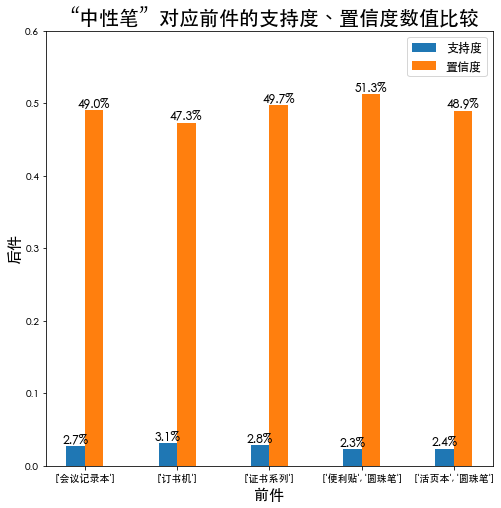

In [91]:
plt.figure(figsize = (8,8))
plt.bar(x1,y1,width = width)
plt.bar(x2,y2,width = width)
# 设置图表标题名及字体大小
plt.title('“中性笔”对应前件的支持度、置信度数值比较',fontsize = 20)
plt.xticks(x,gel_pens['前件'])
plt.xlabel('前件', fontsize =15)
plt.ylabel('后件', fontsize =15)
# 设置图例
plt.legend(['支持度', '置信度'], fontsize=12)
# 设置 y 轴的数值显示范围
plt.ylim(0, 0.6)
for a,b in zip(x1,y1):
    plt.text(a,b,str(round(b*100,1))+'%',ha = 'center', va = 'bottom', fontsize = 12)
for a,b in zip(x2,y2):
    plt.text(a,b,str(round(b*100,1))+'%',ha = 'center', va = 'bottom', fontsize = 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40055 entries, 0 to 40054
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40055 non-null  int64 
 1   文具      40055 non-null  object
dtypes: int64(1), object(1)
memory usage: 626.0+ KB


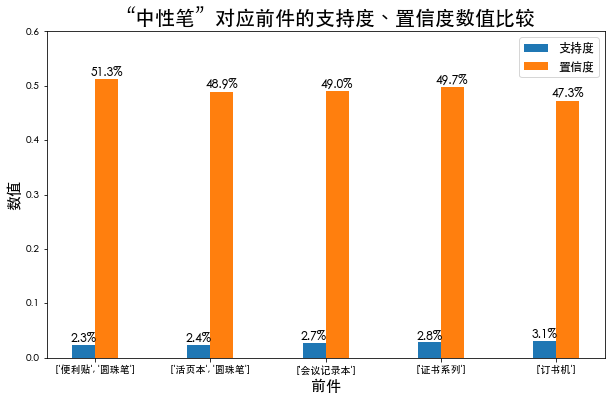

In [95]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt

# 读取【StationeryOrder.csv】文件数据，相对路径为'./工作/StationeryOrder.csv'
data = pd.read_csv('StationeryOrder.csv', encoding='gbk')

# 查看数据的前 10 行信息
data.head(10)


# 查看数据基本信息
data.info()
# 查看数据中的重复行
data[data.duplicated()]
# 查看数据的描述性统计信息
data.describe()

# 定义函数，将数据类型转换成列表


def conversion_data(stationery):
    # 判断文具类别是否已经转成了列表格式
    if str(stationery)[0] == '[':
        # 直接返回文具类别
        return stationery
    # 返回转成列表格式后的文具类别
    return [stationery]


# 将“文具”列数据由“字符串”格式转变为“包含单个字符串的列表”格式
data['文具'] = data['文具'].agg(conversion_data)
# 将同一“id”的“包含单个字符串的列表”数据聚合为“包含多个字符串的列表”数据，并重置索引
new_data = data.groupby('id').sum().reset_index()

# 设置最小支持度、最小置信度以及最小提升度分别为：0.02、0.45、1
results = apriori(new_data['文具'], min_support=0.02,
                min_confidence=0.45, min_lift=1)
# 创建列表
extract_result = []

for result in results:
    # 获取支持度,并保留3位小数
    support = round(result.support, 3)

    # 遍历ordered_statistics对象
    for rule in result.ordered_statistics:
        # 获取前件和后件并转成列表
        head_set = list(rule.items_base)
        tail_set = list(rule.items_add)

        # 跳过前件为空的数据
        if head_set == []:
            continue

        # 提取置信度，并保留3位小数
        confidence = round(rule.confidence, 3)
        # 提取提升度，并保留3位小数
        lift = round(rule.lift, 3)

        # 将提取的数据保存到提取列表中
        extract_result.append([head_set, tail_set, support, confidence, lift])

# 将数据转化为 DataFrame 的格式
result_df = pd.DataFrame(extract_result, columns=[
    '前件', '后件', '支持度', '置信度', '提升度'])


# 将“前件”、“后件”列转成字符串，方便后续提取数据
result_df['前件'] = result_df['前件'].astype('str')
result_df['后件'] = result_df['后件'].astype('str')
# 提取后件中“中性笔”的数据
gel_pens = result_df[result_df['后件'] == "['中性笔']"]
# 按照“支持度”对提取的数据进行排序
gel_pens = gel_pens.sort_values('支持度')


# 获取重置后的索引
df_index = gel_pens.reset_index().index
# 设置 柱子的宽度
width = 0.2
# 设置 x 的坐标值
x = df_index
x1 = x-width/2
x2 = x+width/2
# 设置 y 的坐标值
y1 = gel_pens['支持度']
y2 = gel_pens['置信度']


# 设置字体
plt.rcParams['font.family'] = ['HeiTi TC']
# 设置画布尺寸
plt.figure(figsize=(10, 6))

# 绘制多组柱状图
plt.bar(x1, y1, width=width)
plt.bar(x2, y2, width=width)

# 设置图表标题名及字体大小
plt.title('“中性笔”对应前件的支持度、置信度数值比较', fontsize=20)

# 设置 x 坐标轴的刻度
plt.xticks(x, gel_pens['前件'])

# 设置坐标轴的标题名及字体大小
plt.xlabel('前件', fontsize=15)
plt.ylabel('数值', fontsize=15)

# 设置 y 轴的数值显示范围
plt.ylim(0, 0.6)

# 设置图例
plt.legend(['支持度', '置信度'], fontsize=12)

# 设置数据标签
for a, b in zip(x1, y1):
    plt.text(a, b, str(round(b*100, 1))+'%',
            ha='center', va='bottom', fontsize=12)
for a, b in zip(x2, y2):
    plt.text(a, b, str(round(b*100, 1))+'%',
            ha='center', va='bottom', fontsize=12)
